<a href="https://colab.research.google.com/github/akshayiitd/akshayiitd.github.io/blob/main/mobv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Transfer learning in image classification

In [1]:
!pip install tensorflow

In [2]:
!nvidia-smi

Tue Jul 13 08:49:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

###Make predictions using pre-trained model

In [4]:
IMAGE_SHAPE=(224,224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

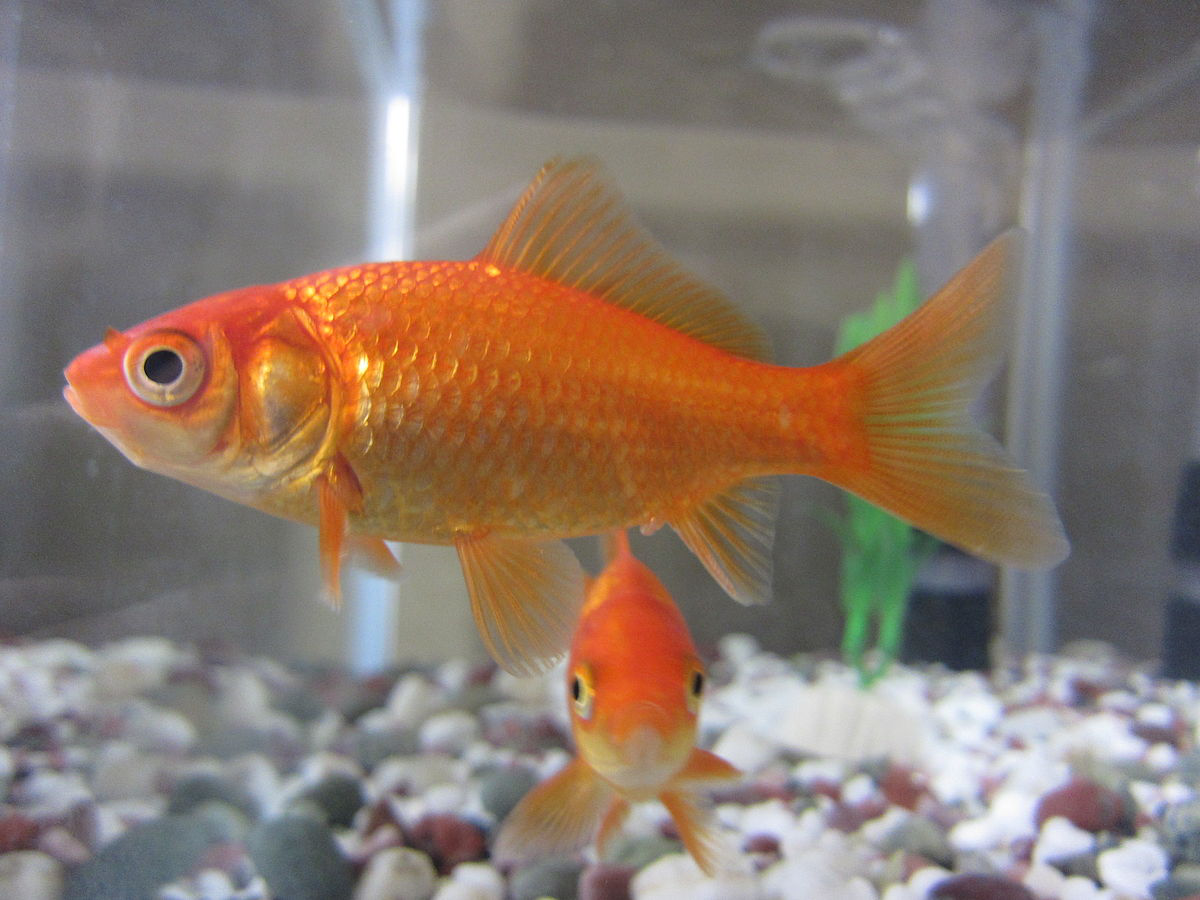

In [5]:
gold_fish = tf.keras.utils.get_file('image.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/%E3%83%AF%E3%82%AD%E3%83%B320120701.JPG/1200px-%E3%83%AF%E3%82%AD%E3%83%B320120701.JPG')
gold_fish = Image.open(gold_fish)
gold_fish

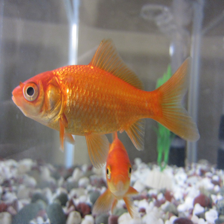

In [6]:
gold_fish=gold_fish.resize(IMAGE_SHAPE)
gold_fish

In [7]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [8]:
gold_fish

array([[[0.45098039, 0.45490196, 0.50980392],
        [0.45490196, 0.46666667, 0.52941176],
        [0.45490196, 0.47058824, 0.5372549 ],
        ...,
        [0.30196078, 0.30196078, 0.30196078],
        [0.31764706, 0.30196078, 0.31372549],
        [0.30588235, 0.30196078, 0.31764706]],

       [[0.4627451 , 0.46666667, 0.52156863],
        [0.46666667, 0.47843137, 0.5372549 ],
        [0.4627451 , 0.47843137, 0.54117647],
        ...,
        [0.30980392, 0.30196078, 0.31764706],
        [0.31764706, 0.31764706, 0.3254902 ],
        [0.3254902 , 0.31372549, 0.31764706]],

       [[0.47843137, 0.4745098 , 0.52941176],
        [0.48235294, 0.48627451, 0.54117647],
        [0.47843137, 0.49411765, 0.54117647],
        ...,
        [0.31372549, 0.30980392, 0.3254902 ],
        [0.31372549, 0.30588235, 0.31764706],
        [0.31764706, 0.30196078, 0.30588235]],

       ...,

       [[0.55686275, 0.55686275, 0.56078431],
        [0.57254902, 0.56862745, 0.57254902],
        [0.59215686, 0

In [9]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [10]:
classifier.predict(gold_fish[np.newaxis, ...])

array([[ 0.23040906,  3.542522  , 11.050813  , ..., -1.9657131 ,
         0.82122344,  0.43177378]], dtype=float32)

In [11]:
result=classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [12]:
result

array([[ 0.23040906,  3.542522  , 11.050813  , ..., -1.9657131 ,
         0.82122344,  0.43177378]], dtype=float32)

In [13]:
predicted_label_index=np.argmax(result)
predicted_label_index

2


###Load flowers dataset

In [14]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = np.array(open(labels_path).read().splitlines())
image_labels[:5]

array(['background', 'tench', 'goldfish', 'great white shark',
       'tiger shark'], dtype='<U30')

In [15]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [16]:
data_dir

'./datasets/flower_photos'

In [17]:
import pathlib
data_dir= pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [18]:
list(data_dir.glob('*/*.jpg'))[:4]

[PosixPath('datasets/flower_photos/dandelion/129019877_8eea2978ca_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5629940298_634f35125c.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2503034372_db7867de51_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2444241718_3ca53ce921.jpg')]

In [19]:
image_count= len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [20]:
roses= list(data_dir.glob('roses/*'))
roses[:4]

[PosixPath('datasets/flower_photos/roses/3667366832_7a8017c528_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3145692843_d46ba4703c.jpg'),
 PosixPath('datasets/flower_photos/roses/3661675690_ed2d05fa5f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15509799653_0562d4a4fa.jpg')]

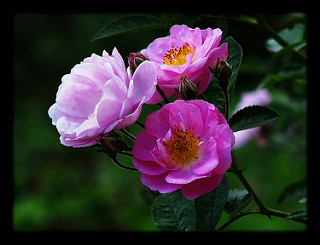

In [21]:
Image.open(str(roses[2]))


###Read flowers images into numpy array

In [22]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [23]:
flowers_images_dict['roses']

[PosixPath('datasets/flower_photos/roses/3667366832_7a8017c528_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3145692843_d46ba4703c.jpg'),
 PosixPath('datasets/flower_photos/roses/3661675690_ed2d05fa5f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15509799653_0562d4a4fa.jpg'),
 PosixPath('datasets/flower_photos/roses/12243069253_e512464095_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6732261031_861a1026fa_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2501297526_cbd66a3f7e_m.jpg'),
 PosixPath('datasets/flower_photos/roses/483444865_65962cea07_m.jpg'),
 PosixPath('datasets/flower_photos/roses/9404876600_04f6d37685.jpg'),
 PosixPath('datasets/flower_photos/roses/3109712111_75cea2dee6.jpg'),
 PosixPath('datasets/flower_photos/roses/8337607102_d9e0fa887e.jpg'),
 PosixPath('datasets/flower_photos/roses/2197754124_5c8a146761_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8050213579_48e1e7109f.jpg'),
 PosixPath('datasets/flower_photos/roses/2777518561_105abc8cfc_n.jpg'),
 Po

In [24]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [25]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/3667366832_7a8017c528_n.jpg'

In [26]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))

In [27]:
img.shape


(240, 320, 3)

In [28]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [29]:
x, y= [], []
for flower_name,images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(224,224))
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [30]:
x = np.array(x)
y = np.array(y)

###Train test split

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [32]:
x_train_scaled= x_train/255
x_test_scaled= x_test/255

###Prediction using pre-trained model on new flowers dataset

In [33]:
X0_resized = cv2.resize(x[0], IMAGE_SHAPE)
X1_resized = cv2.resize(x[1], IMAGE_SHAPE)
X2_resized = cv2.resize(x[2], IMAGE_SHAPE)

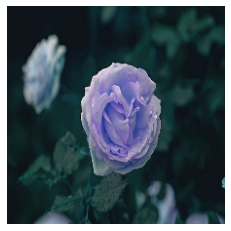

In [34]:
plt.axis('off')
plt.imshow(x[3])

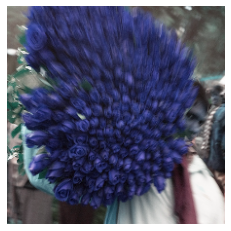

In [35]:
plt.axis('off')
plt.imshow(x[1])

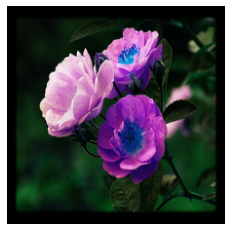

In [36]:
plt.axis('off')
plt.imshow(x[2])

In [37]:
predicted = classifier.predict(np.array([X0_resized, X1_resized, X2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 795, 722])

In [38]:
image_labels[795]

'shower curtain'

In [39]:
image_labels[722]

'pillow'

###Taking pre-trained model and retrain it using flowers images

In [40]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [41]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [46]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

history= model.fit(x_train_scaled, y_train, epochs=6)

Epoch 1/6
86/86 [==============================] - 4s 40ms/step - loss: 0.1998 - acc: 0.9404
Epoch 2/6
86/86 [==============================] - 3s 40ms/step - loss: 0.1635 - acc: 0.9560
Epoch 3/6
86/86 [==============================] - 3s 40ms/step - loss: 0.1450 - acc: 0.9637
Epoch 4/6
86/86 [==============================] - 3s 40ms/step - loss: 0.1281 - acc: 0.9688
Epoch 5/6
86/86 [==============================] - 3s 40ms/step - loss: 0.1112 - acc: 0.9775
Epoch 6/6
86/86 [==============================] - 3s 40ms/step - loss: 0.1021 - acc: 0.9797


In [43]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 2s 52ms/step - loss: 0.3951 - acc: 0.8540


[0.3950914144515991, 0.8540304899215698]

In [47]:
history.history.keys()

dict_keys(['loss', 'acc'])

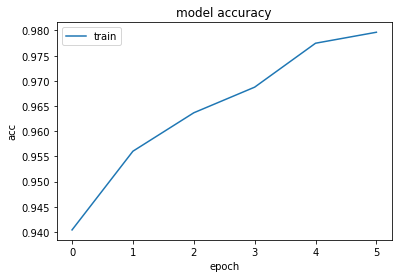

In [49]:
import matplotlib.pyplot as plt 
plt.plot(history.history['acc']) 
plt.title('model accuracy') 
plt.ylabel('acc') 
plt.xlabel('epoch') 
plt.legend (['train'], loc='upper left') 
plt.show()

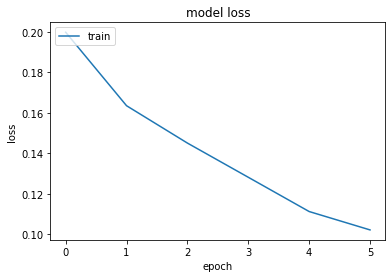

In [50]:
plt.plot(history.history['loss']) 
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch') 
plt.legend (['train'], loc='upper left')  
plt.show()